<img src="./logo_UNSAM.jpg" align="right" width="150" />

# Trabajo Práctico 2
**Carola Piazze Vicini**

## Introducción

El objetivo de este trabajo fue analizar y simular el comportamiento de sistemas lineales e invariantes en el tiempo (LTI), mediante la resolución de ecuaciones en diferencias, el cálculo de la respuesta al impulso, y la implementación de convolución en tiempo discreto. 

### Sistemas LTI
Un sistema LTI (lineal e invariante en el tiempo) es un tipo de sistema cuya salida se puede predecir completamente a partir de su entrada.
Es **lineal** porque cumple con los principios de superposición y homogeneidad, e **invariante en el tiempo** porque su comportamiento y parámetros no cambian al desplazar la señal de entrada.
En tiempo discreto, muchos sistemas LTI se describen mediante ecuaciones en diferencias, que relacionan muestras actuales y pasadas de la salida con muestras de la entrada.  

Una forma general es:

$$
y[n] + a_1 y[n-1] + a_2 y[n-2] + \dots + a_N y[n-N] = b_0 x[n] + b_1 x[n-1] + \dots + b_M x[n-M]
$$

donde:
- **y[n]**: salida del sistema  
- **x[n]**: entrada del sistema  
- **aᵢ** y **bⱼ**: coeficientes constantes que definen el comportamiento del sistema  
  
Resolver esta ecuación equivale a encontrar la dinámica del sistema, es decir, cómo responde la salida a cualquier señal de entrada.  

En particular, si la entrada es un impulso unitario delta[n], la salida resultante es la respuesta al impulso **h[n]**.  

La relación fundamental entre entrada y salida se expresa como la **convolución** entre la señal de entrada y la respuesta al impulso:

$$
y[n] = (x * h)[n] = \sum_{k=-\infty}^{\infty} x[k] \, h[n-k]
$$

De esta forma, conocer \(h[n]\) permite predecir la salida para cualquier señal de entrada.

La convolución discreta es la operación que combina dos secuencias para producir una tercera, y describe cómo la forma de \(h[n]\) moldea a la entrada \(x[n]\).  

Para señales de duración finita, la expresión se reduce a una suma finita:

$$
y[n] = \sum_{k=0}^{N-1} x[k] \, h[n-k]
$$

En la práctica, se implementan bucles o funciones como np.convolve para obtener la salida de la forma más eficiente posible a partir de la respuesta al impulso.  



Señal: x1_seno
  Frecuencia de muestreo: 60000 Hz
  Duración: 0.002000 s


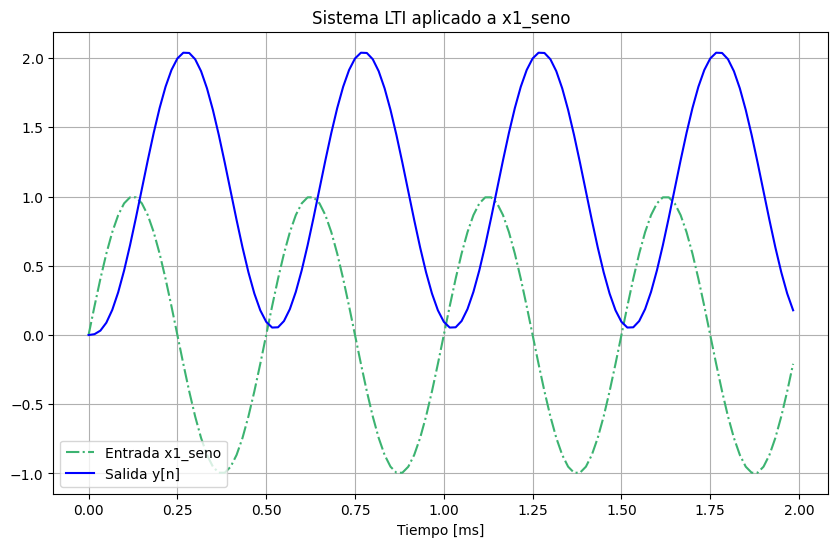

Potencia de salida para x1_seno: 1.592266e+00

Señal: x2_seno_A2_desfase
  Frecuencia de muestreo: 60000 Hz
  Duración: 0.002000 s


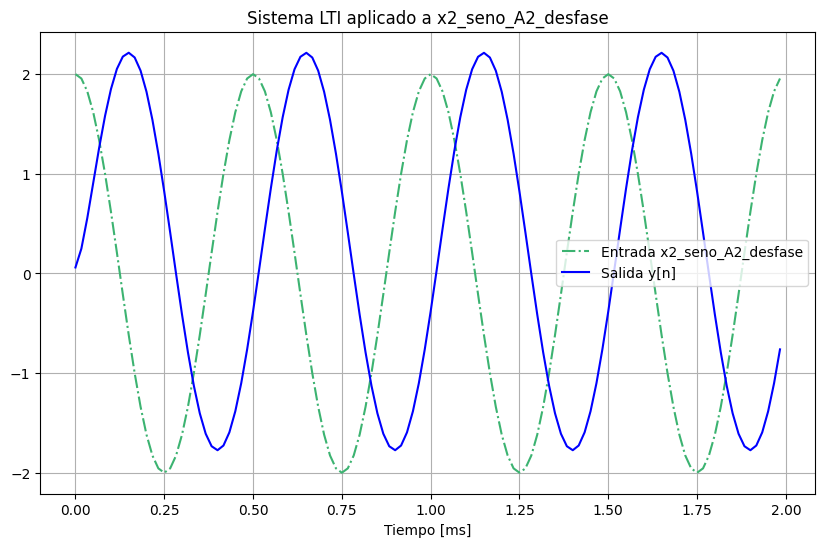

Potencia de salida para x2_seno_A2_desfase: 2.039398e+00

Señal: x3_AM
  Frecuencia de muestreo: 60000 Hz
  Duración: 0.002000 s


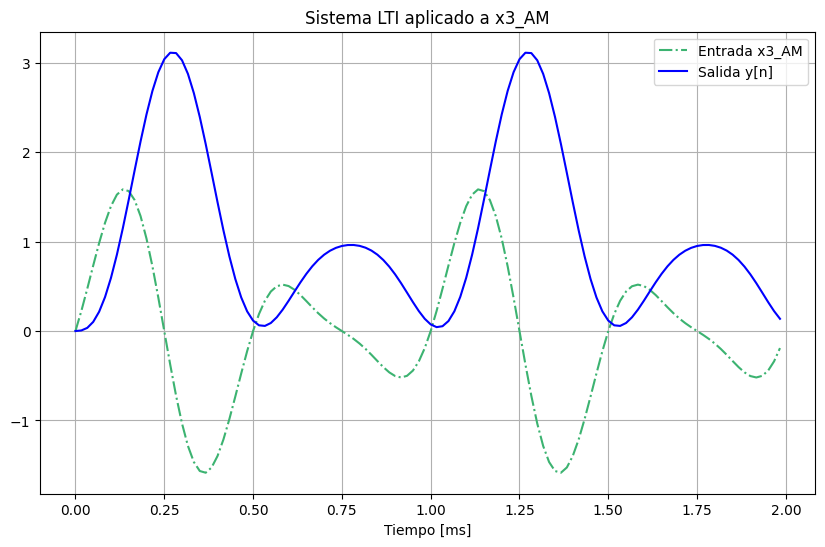

Energía de salida para x3_AM: 3.934827e-03

Señal: x1_clipped
  Frecuencia de muestreo: 60000 Hz
  Duración: 0.002000 s


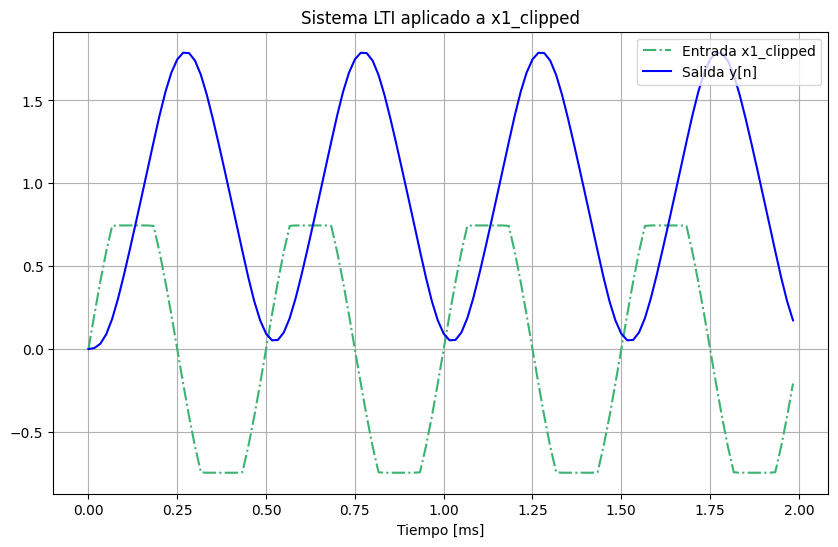

Energía de salida para x1_clipped: 2.419734e-03

Señal: x_cuadrada
  Frecuencia de muestreo: 60000 Hz
  Duración: 0.005000 s


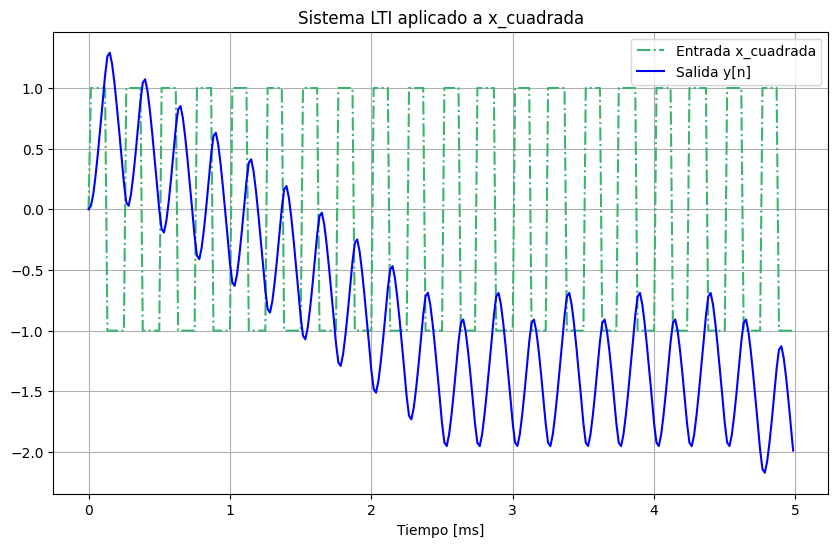

Potencia de salida para x_cuadrada: 1.366065e+00

Señal: x_rectangular
  Frecuencia de muestreo: 60000 Hz
  Duración: 0.020000 s


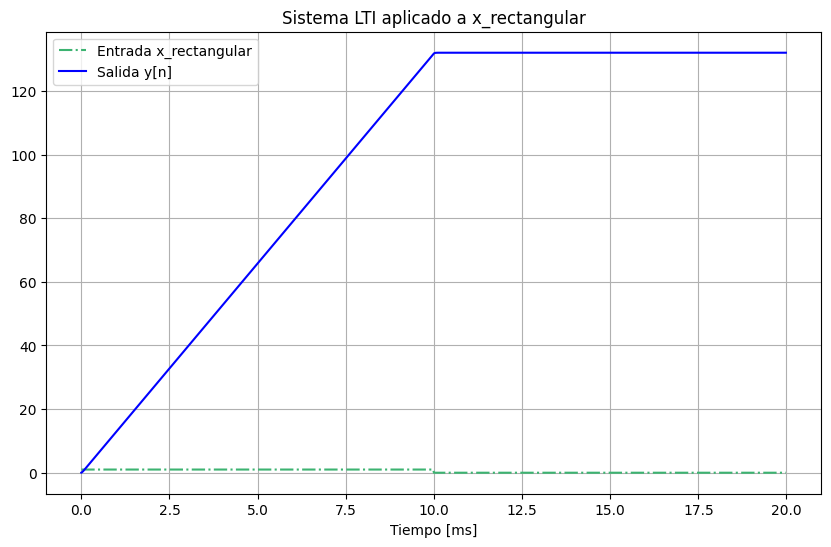

Energía de salida para x_rectangular: 2.318833e+02


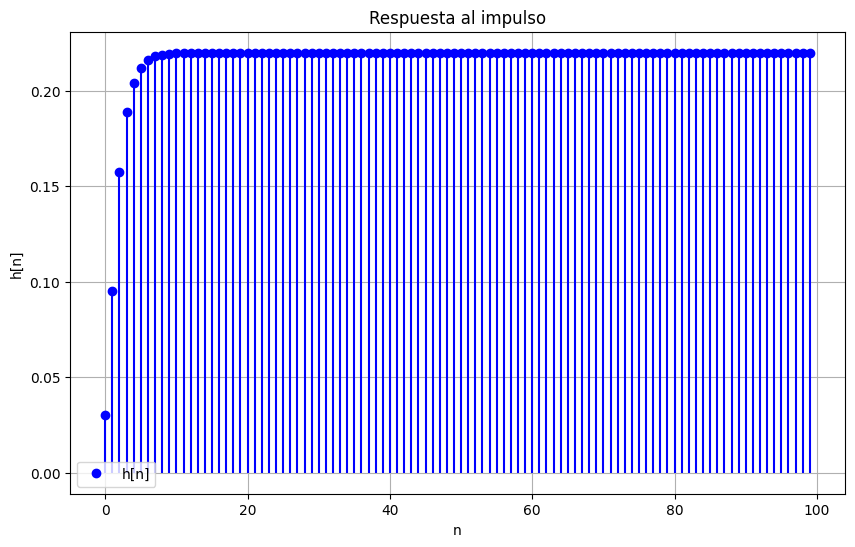

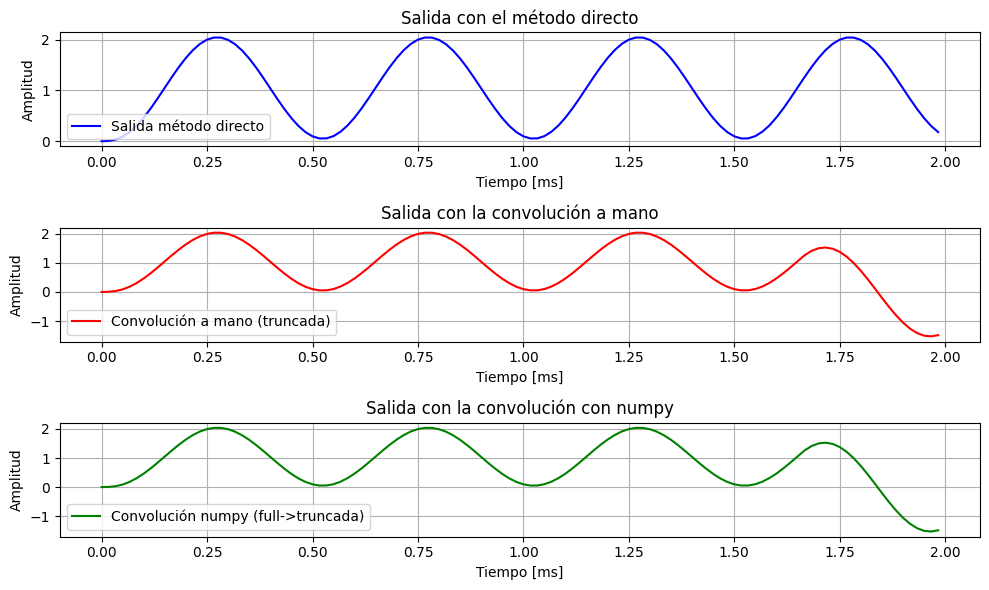

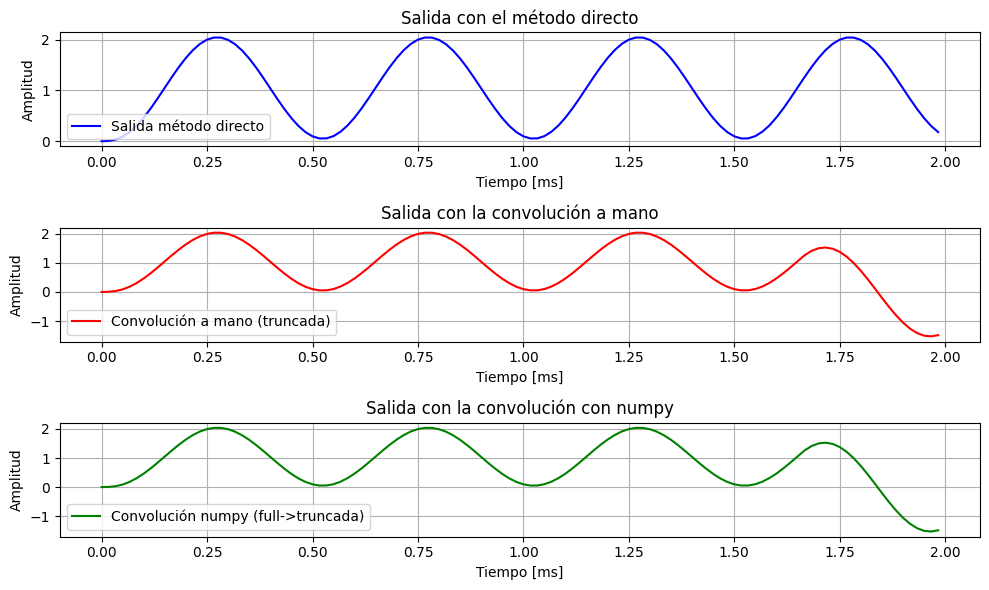

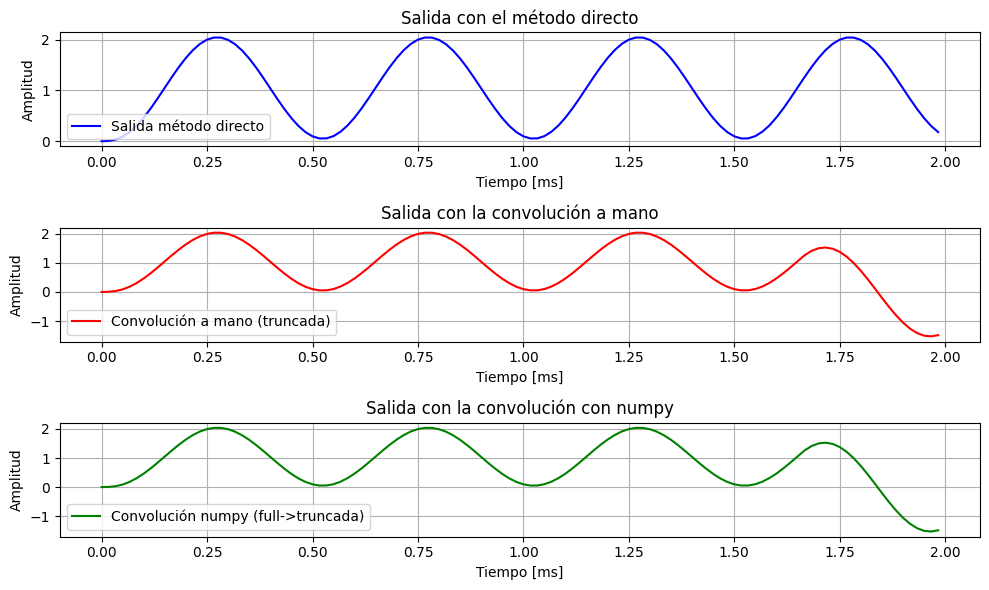

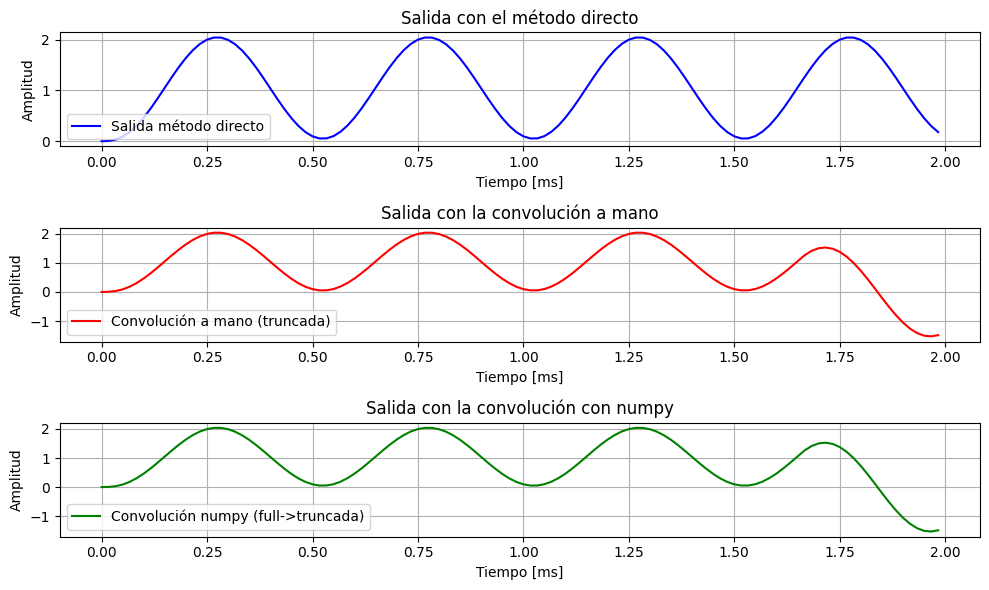

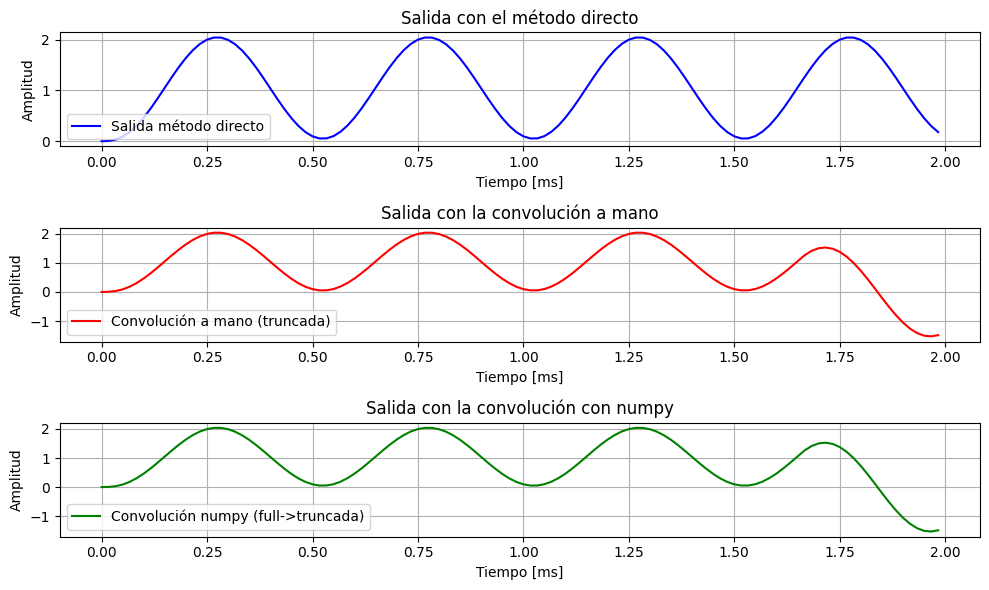

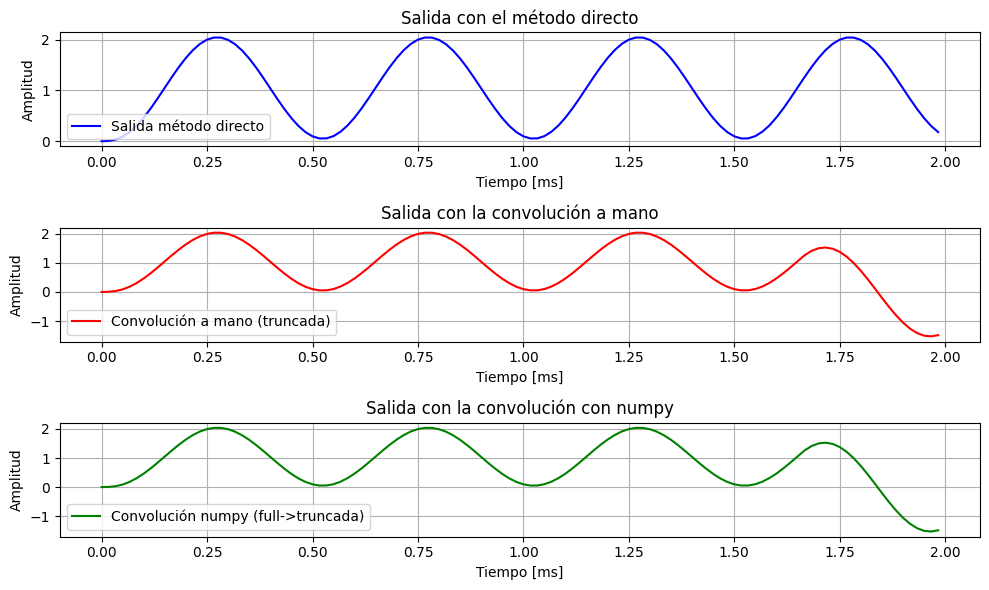

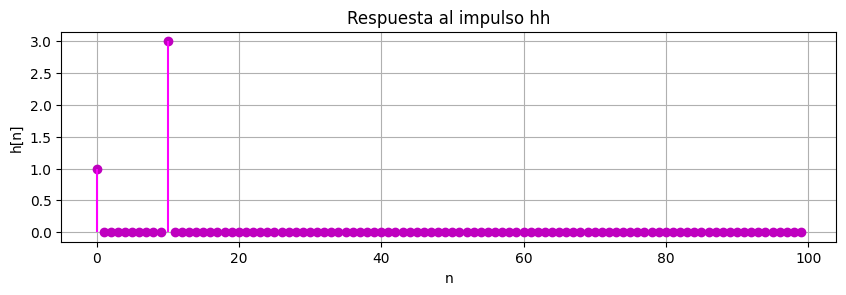

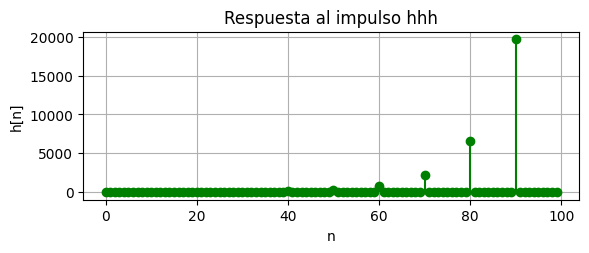

<Figure size 640x480 with 0 Axes>

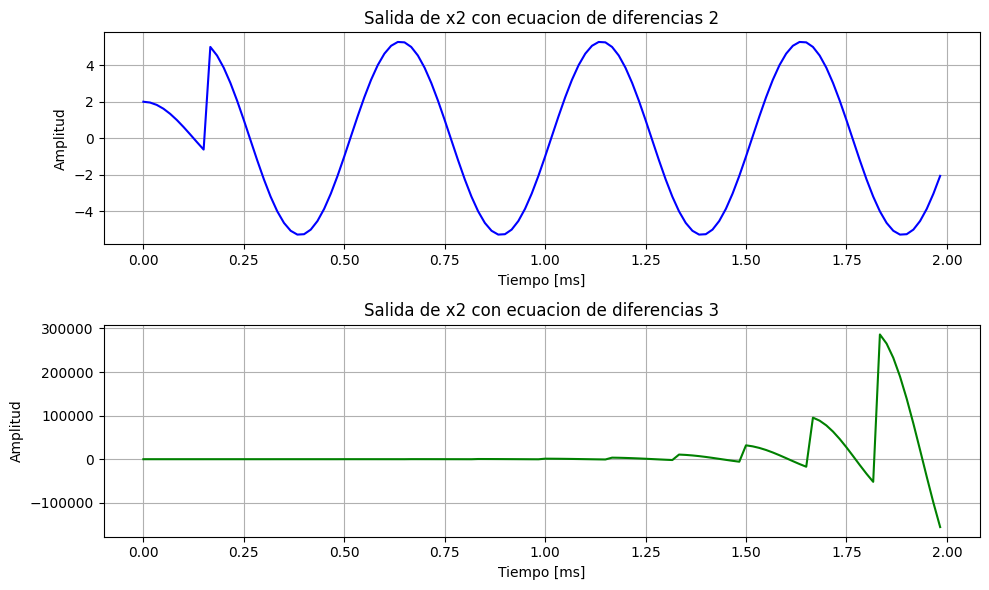

In [4]:
import numpy as np
import matplotlib.pyplot as plt


fs = 60000      
Ts = 1 / fs        

#copio señales ts1
t_seno = np.linspace(0, 0.002, int(fs*0.002), endpoint=False)   # 2 ms
t_cuadrada = np.linspace(0, 0.005, int(fs*0.005), endpoint=False)  # 5 ms
t_pulso = np.linspace(0, 0.02, int(fs*0.02), endpoint=False)     # 20 ms

frec = 2000.0  # Hz
x1 = np.sin(2*np.pi*frec*t_seno)                      # seno 2 kHz
x2 = 2*np.sin(2*np.pi*frec*t_seno + np.pi/2)          # A=2, desfase pi/2
frec_mod = 1000.0
m = 0.8
x3 = (1 + m*np.sin(2*np.pi*frec_mod*t_seno)) * np.sin(2*np.pi*frec*t_seno)  # AM
A = np.max(np.abs(x1))
x1_clipped = np.clip(x1, -0.75*A, 0.75*A)
frec_cuadrada = 4000.0
x_cuadrada = np.sign(np.sin(2*np.pi*frec_cuadrada*t_cuadrada))
pulso = 0.01
x_rectangular = np.where(t_pulso < pulso, 1, 0)



# guardo las señales en un diccionario para iterar
señales = {
    'x1_seno': (x1, t_seno),
    'x2_seno_A2_desfase': (x2, t_seno),
    'x3_AM': (x3, t_seno),
    'x1_clipped': (x1_clipped, t_seno),
    'x_cuadrada': (x_cuadrada, t_cuadrada),
    'x_rectangular': (x_rectangular, t_pulso),

}

#funciones auxiliares

def calc_potencia(x): #(para periódicas)
    return np.mean(x**2)

def calc_energia(x, Ts): #(para finitas)
    return np.sum(x**2) * Ts

#tener en cuenta que como es causal todo lo que pase antes (ejemplo y[n-1]) cuando n es 0 debe ser cero, por eso las condiciones del for
def LTI_1(x):
    N = len(x)         
    y = np.zeros(N) 
    #inicializo el vector de ceros como en clase

    # caso n=0
    y[0] = 0.03 * x[0]

    # caso  n=1
    if N > 1:  # para que no se rompa todo si la señal es muy corta
        y[1] = 0.03*x[1] + 0.05*x[0] + 1.5*y[0]

    # cuando n >= 2
    for n in range(2, N):
        y[n] = (0.03*x[n] + 0.05*x[n-1] + 0.03*x[n-2]
                 + 1.5*y[n-1] - 0.5*y[n-2])
    return y

# convolución a mano para después comparar con umpy
def conv_amano(x, h):
    N = len(x)
    M = len(h)
    y = np.zeros(N + M - 1)
    for n in range(len(y)):
        for k in range(max(0, n - M + 1), min(n + 1, N)):
            if 0 <= n - k < M:
                y[n] += x[k] * h[n - k]
    return y   # ahora devuelvo la convolución 'full' para decidir después si trunco para la comparación causal

#respuesta al impulso
def impulso(sistema, N_impulso = 100):
    delta = np.zeros(N_impulso)
    delta[0] = 1
    h = sistema(delta)
    return h

# ======================== ITEM 1

# recorro las señales definidas yvoy aplicando el lti
for nombre, (x, t) in señales.items():
    y = LTI_1(x)  # aplico
    #info de la señal
    duracion = t[-1] + Ts
    print(f"\nSeñal: {nombre}")
    print(f"  Frecuencia de muestreo: {fs} Hz")
    print(f"  Duración: {duracion:.6f} s")
    # gráfico comparando entrada y salida
    plt.figure(figsize=(10, 6))
    plt.plot(t*1000, x, '-.',color='mediumseagreen', label="Entrada " + nombre)
    plt.plot(t*1000, y,'b', label="Salida y[n]")
    plt.xlabel("Tiempo [ms]")
    plt.title("Sistema LTI aplicado a " + nombre)
    plt.legend()
    plt.grid(True)
    plt.show()

    # cálculos de energia y ppotencia
        # cálculos de energía y potencia (regla práctica)
    if nombre in ('x1_seno', 'x2_seno_A2_desfase', 'x_cuadrada'):
        pot = calc_potencia(y)
        print(f"Potencia de salida para {nombre}: {pot:.6e}")
    else:
        ener = calc_energia(y, Ts)
        print(f"Energía de salida para {nombre}: {ener:.6e}")



#respuesta al impulso
h=impulso(LTI_1)
n = np.arange(len(h))
plt.figure(figsize=(10, 6))
plt.plot(n, h, 'bo', label='h[n]')   
plt.vlines(n, 0, h, colors='b')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('Respuesta al impulso')
plt.grid(True)
plt.legend()
plt.show()


#comparación de convolución
# comparación de convolución (parche mínimo)
for nombre, (x, t) in señales.items():
    N = len(x)
    # salida por ecuación en diferencias (directa)
    y_lti = LTI_1(x)
    
    y_amano_full = conv_amano(x1, h)               # conv a mano (full)
    y_amano = y_amano_full[:len(x1)]               # truncar para salida causal
    y_numpy_full = np.convolve(x1, h, mode='full') # conv numpy (full)
    y_numpy = y_numpy_full[:len(x1)]               # truncar para salida causal
    y_lti = LTI_1(x1)
    
    
    # Graficar comparación (con labels para evitar warnings)
    plt.figure(figsize=(10, 6))
    
    plt.subplot(3, 1, 1)
    plt.plot(t_seno*1000, y_lti, 'b-', label='Salida método directo')
    plt.title('Salida con el método directo')
    plt.xlabel('Tiempo [ms]')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(3, 1, 2)
    plt.plot(t_seno*1000, y_amano, 'r-', label='Convolución a mano (truncada)')
    plt.title('Salida con la convolución a mano')
    plt.xlabel('Tiempo [ms]')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(3, 1, 3)
    plt.plot(t_seno*1000, y_numpy, 'g-', label='Convolución numpy (full->truncada)')
    plt.title('Salida con la convolución con numpy')
    plt.xlabel('Tiempo [ms]')
    plt.ylabel('Amplitud')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()



# ======================== ITEM 2


def sist_1(x):
    N = len(x)
    y = np.zeros(N)
    
    for n in range(N):
        if n < 10:
            y[n] = x[n] 
        else:
            y[n] = x[n] + 3 * x[n-10]
    
    return y


def sist_2(x):
    N = len(x)
    y = np.zeros(N)
    
    for n in range(N):
        if n < 10:
            y[n] = x[n] 
        else:
            y[n] = x[n] + 3 * y[n-10]
    
    return y   

# impulsos, uso x2 para variar aunque es práticamente igual
hh=impulso(sist_1)
hhh=impulso(sist_2)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
n = np.arange(len(hh))
plt.plot(n, hh, 'mo')  
plt.vlines(n, 0, hh, colors='magenta')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('Respuesta al impulso hh')
plt.grid(True)
plt.show()

plt.subplot(2, 1, 2)
n = np.arange(len(hhh))
plt.plot(n, hhh, 'go')  
plt.vlines(n, 0, hhh, colors='green')
plt.xlabel('n')
plt.ylabel('h[n]')
plt.title('Respuesta al impulso hhh')
plt.grid(True)
plt.show()

plt.tight_layout()
plt.show()

#salidas
y1 = sist_1(x2)
y2 = sist_2(x2)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t_seno*1000, y1, 'b-')
plt.title('Salida de x2 con ecuacion de diferencias 2')
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(t_seno*1000, y2, 'g-')
plt.title('Salida de x2 con ecuacion de diferencias 3')
plt.xlabel('Tiempo [ms]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()



## Análisis y desarrollo
Se analizó un sistema LTI definido por la ecuación en diferencias:

y[n]=0.03x[n]+0.05x[n−1]+0.03x[n−2]+1.5y[n−1]−0.5y[n−2]

Como entrada se usaron cinco señales generadas de las generadas en el TP anterior:

x1_seno: Onda senoidal de 2 kHz, amplitud 1.

x2_seno_A2_desfase: Onda senoidal de 2 kHz, amplitud 2, desfase $\pi/2$.

x3_AM: Señal modulada en amplitud con portadora de 2 kHz y moduladora de 1 kHz.

x1_clipped: Seno de 2 kHz con recorte a $\pm 0.75$ de la amplitud.

x_cuadrada: Onda cuadrada de 4 kHz.

Todas las señales se consideraron causales y se definieron con una frecuencia de muestreo $f_s = 60 \text{ kHz}$.

### Item 1
Para cada señal se aplicó la ecuación de diferencias LTI_1:

Para $n = 0$ y $n = 1$ se aplican condiciones iniciales (cero para $y[-1]$, $y[-2]$ se considera fuera de rango).

Para $n \geq 2$, se aplica la ecuación completa.

#### Interpretación de los gráficos de salida:

x1_seno y x2_seno_A2_desfase: El sistema modifica la amplitud y la fase, pero mantiene la periodicidad de la señal.

x3_AM: En la salida aún se puede ver la modulación de amplitud; pero se observa un suavizado de la envolvente debido a la combinación de coeficientes en $x[n]$ y la retroalimentación.

x1_clipped: Se observa que la salida es una senoidal desfazada verticalmente, no parece haber rastros de los recortes presentes en la señal de entrada. Lo que entiendo es que como el sistema es invariante en el tiempo no puede mantener las discontinuidades del recorte, solo responde a la combinación lineal de x[n] y su propia memoria.

x_cuadrada: Se observa un decaimiento vertical inicial de la señal de salida. Interpreto que es poeque la salida se está adaptando desde las condiciones iniciales hasta una respuesta estable. Por lo mencionado en el análisis del gráfico anterior, también se observa que los bordes se suavizan y la señal deja de parecerse a una cuadrada, se parece más a una senoidal. 

#### Respuesta al impulso para x1

Se observa que h[n] sube rápido en las primeras muestras y luego se estabiliza en un valor aproximadamente constante, es decir que la respuesta al impulso tiende a una constante en vez de decaer a cero. 

#### Comparación de cálculos de convolución y salida
Los gráficos si bien mantienen una similitud, son claramente distintos. La convolución a mano e incluso la de numpy se ven deformadas en comparación con la salida directa. Según entiendo esto no debería pasar, o por lo menos no tan notoriamente, ya que los métodos deberían producir resultados casi iguales. Debo indagar un poco más en por qué esto no salió. 

### Item 2
Se implementaron dos sistemas definidos mediante ecuaciones en diferencias llamadas sis_1y sist_2, a la señal x2. Para caracterizar ambos sistemas se calculó su respuesta al impulso (hh y hhh) y se representó gráficamente. 

El gráfico de la respuesta al impulso de sist_1 muestra un impulso en n=0 con valor de aproximadamente 1 y luedo otro en n=10 con valor de aproximadamente 3, luego se estabiliza a cero. 

El gráfico de la respuesta al impulso de sist_2 muestra impulsos cuyas amplitudes parecen crecer geometricamente, no parece que vaya a estabilizarse sino más bien que seguirá creciendo exponencialmente. 

No considero tener las herramientas suficientes para sacar conclusiones al respecto.

Respecto a las salidas se puede ver como la primera senoidal (salida con ecuación de diferencias 2) se estabiliza rápidamente, mientras que la segunda (salida con ecuación de diferencias 3), sufre unos cantos contratiempos antes de siquiera empezar a parecerse a una senoidal. 

### Conclusiones y aprendizajes
El trabajo me permitió visualizar cómo distintos sistemas LTI procesan señales de entrada mediante ecuaciones en diferencias y la convolución discreta, sin embargo debo profundizar para lograr interpretar mejor los resultados. 

Al aplicar diferentes señales de prueba al primer sistema LTI (senoidal, modulada, recortada y cuadrada) se observó que el sistema tiende a suavizar discontinuidades y a filtrar armónicos, aproximando las señales a formas más senoidales.

Si bien investigué sobre la teoría, y entiendo que  conocer \(h[n]\) debería mermitirme predecir la salida para cualquier señal de entrada, no considero haber sido capaz de bajarlo a tierra de forma concreta.

Me gustaría aclarar que durante mi último día de trabajo en este tp, jupyter notebook decidió que no iba a guardar los cambios, la página dejó de funcionar y al refrescarla todo volvió a la versión del día anterior. Esto no solo me complicó respecto a tiempos, sino que me generó un poco de angustia y desgano a la hora de investigar el comportamiento de mis señales más profundamente, porque tuve que escribir muchas cosas de nuevo. Seré más cuidadosa en escribir la parte textual del informe en otra plataforma para que no me vuelva a pasar. 
Genuinamente espero el feedback para poder entender mejor los resultados, y así mejorar aspectos del análisis. 

### Autoevaluación del aprendizaje
Resolví la tarea, pero no entendí bien.
Creo que logré entender más sobre como los sistemas LTI modifican las señales respecto a lo que había entendido en clase, pero no lo suficiente. 

Utilicé ChatGPT y algo de Deepseek para pasar a código algunas ideas que no lograba correr por mi cuenta, también para ayuda en la búsqueda de errores. NO utilicé IA para el texto (a excepción de pedirle que me formatee las ecuaciones), aunque tuve que googlear algunos de los conceptos teóricos para estar segura. 